In [ ]:
#  Import thư viện
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#  Đọc ảnh PNG có nền trong suốt
mountain = cv2.imread('nui.jpg', cv2.IMREAD_UNCHANGED)
boat = cv2.imread('thuyen.jpg', cv2.IMREAD_UNCHANGED)


In [ ]:
#  Hàm xoay ảnh giữ kích thước (reshape=False)
def rotate_image(img, angle):
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1.0)
    return cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_TRANSPARENT)


In [ ]:
#  Hàm tạo phản chiếu dọc
def vertical_mirror(img):
    flipped = cv2.flip(img, 0)
    h, w = img.shape[:2]
    alpha = img[:, :, 3]
    # Giảm dần alpha cho vùng phản chiếu (gradient fade)
    fade = np.tile(np.linspace(1, 0, h).reshape(h, 1), (1, w))
    alpha_f = (alpha.astype(float) * fade).astype(np.uint8)
    flipped[:, :, 3] = alpha_f
    return flipped


In [7]:
def ensure_alpha(img):
    if img.shape[2] == 3:
        b, g, r = cv2.split(img)
        alpha = np.ones_like(b) * 255
        img = cv2.merge([b, g, r, alpha])
    return img

# Áp dụng trước khi xử lý
mountain = ensure_alpha(mountain)
boat = ensure_alpha(boat)


In [ ]:
#  Xoay và phản chiếu
mountain_r = rotate_image(mountain, 45)
boat_r = rotate_image(boat, 45)
mountain_m = vertical_mirror(mountain_r)
boat_m = vertical_mirror(boat_r)


In [ ]:
#  Ghép lên canvas trắng
h = max(mountain_r.shape[0] + mountain_m.shape[0], boat_r.shape[0] + boat_m.shape[0])
w = mountain_r.shape[1] + boat_r.shape[1]
canvas = np.ones((h, w, 4), dtype=np.uint8) * 255  # nền trắng

# Đặt mountain
canvas[0:mountain_r.shape[0], 0:mountain_r.shape[1]] = mountain_r
canvas[mountain_r.shape[0]:mountain_r.shape[0] + mountain_m.shape[0], :mountain_m.shape[1]] = mountain_m

# Đặt boat bên phải
x0 = mountain_r.shape[1]
canvas[0:boat_r.shape[0], x0:x0 + boat_r.shape[1]] = boat_r
canvas[boat_r.shape[0]:boat_r.shape[0] + boat_m.shape[0], x0:x0 + boat_m.shape[1]] = boat_m


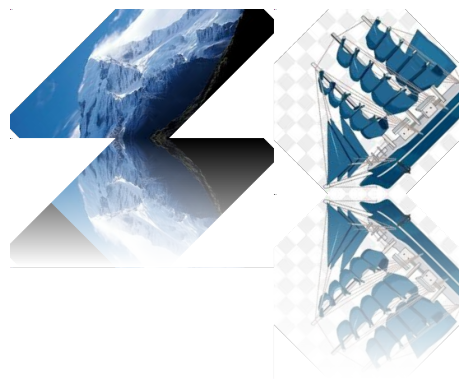

In [ ]:
#  Lưu và hiển thị
cv2.imwrite('mountain_boat_mirror.png', canvas)
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.show()
